In [1]:
import geopandas as gpd 

In [4]:
import pandas as pd
from pathlib import Path

country_scale_df = pd.DataFrame()

stocks_dir = '/Users/diegobengochea/git/iberian.carbon/data/stocks_NFI4/'
for stocks_file in Path(stocks_dir).glob('*foresttype.shp'):
    stocks = gpd.read_file(stocks_file)
    stocks['BGB_Ratio'] = stocks['BGB']/stocks['AGB']
    country_scale_df = pd.concat([country_scale_df,pd.DataFrame(stocks.drop(columns='geometry'))],axis='rows')


In [5]:
country_scale_df

,index,Index_1,AGB,BGB,Year,Region,ForestType,BGB_Ratio
0,0,"(1, 6)",8.747944,48.787356,2017,Extremadura,Eucaliptales,5.577008
1,1,"(2, 6)",6.311431,27.104087,2017,Extremadura,Eucaliptales,4.294444
2,2,"(4, 10)",27.204670,8.207870,2016,Extremadura,Pinar de pino pinaster en región mediterránea,0.301708
3,3,"(5, 10)",79.517931,22.771543,2016,Extremadura,Pinar de pino pinaster en región mediterránea,0.286370
4,4,"(6, 6)",41.329033,81.760016,2017,Extremadura,Eucaliptales,1.978271
...,...,...,...,...,...,...,...,...
18360,2241,"(3876, 33)",72.684235,0.000000,2009,Asturias,Hayedos (Fagus sylvatica),0.000000
18361,2242,"(3878, 33)",12.175685,0.000000,2009,Asturias,Hayedos (Fagus sylvatica),0.000000
18362,2243,"(3879, 33)",97.142661,0.000000,2010,Asturias,Hayedos (Fagus sylvatica),0.000000
18363,2244,"(3880, 33)",167.286988,0.000000,2010,Asturias,Castañares (Castanea sativa),0.000000


In [6]:
df = country_scale_df[country_scale_df.BGB>0]

In [11]:
import numpy as np

def q05(x):
    return np.percentile(x,5)
def q95(x):
    return np.percentile(x,95)    

grouped = df.groupby('ForestType').agg({'BGB_Ratio':('mean',q05,q95,'median')})

In [12]:
grouped

BGB_Ratio            \
                                                        mean       q05   
ForestType                                                               
Abedulares (Betula spp.)                            0.447287  0.242240   
Abetales (Abies alba)                               0.248483  0.165013   
Acebedas (Ilex aquifolium)                          0.705498  0.521382   
Acebuchales (Olea europaea var. Sylvestris)         0.479354  0.330030   
Alcornocales (Quercus suber)                        0.364713  0.245225   
Avellanedas (Corylus avellana)                      0.518035  0.262657   
Bosque mixto de frondosas autóctonas en la regi...  0.470072  0.276706   
Bosque ribereño                                     0.461601  0.271641   
Bosques mixtos de frondosas autóctonas en regio...  0.431684  0.164383   
Bosques mixtos de frondosas autóctonas en regio...  0.523256  0.280260   
Castañares (Castanea sativa)                        0.597710  0.195632   
Choperas y plataneras de producción                 0.377604  0.262479   
Coníferas alóctonas de gestión (Cupressus spp, ...  0.225794  0.190425   
Dehesas                                             0.452169  0.320602   
Encinares (Quercus ilex)                            0.668254  0.397137   
Enebrales (Juniperus spp.)                          0.405440  0.245269   
Eucaliptales                                        2.415489  0.377426   
Fresnedas (Fraxinus spp.)                           0.594960  0.329554   
Frondosas alóctonas con  autóctonas                 1.099653  0.328395   
Frondosas alóctonas invasoras                       0.734593  0.734593   
Hayedos (Fagus sylvatica)                           0.230941  0.156218   
Madroñales (Arbutus unedo)                          0.634557  0.282375   
Melojares (Quercus pyrenaica)                       0.442367  0.273985   
Mezcla de coníferas autoctonas con alóctonas        0.221447  0.088340   
Mezcla de coníferas autóctonas en la región bio...  0.447952  0.235436   
Mezcla de coníferas autóctonas en la región bio...  0.376778  0.365260   
Mezcla de coníferas autóctonas en la región bio...  0.342387  0.215390   
Mezcla de coníferas con frondosas, autoctónas c...  0.401728  0.130703   
Mezcla de coníferas y frondosas autóctonas en l...  0.428304  0.189104   
Mezcla de coníferas y frondosas autóctonas en l...  0.411235  0.334483   
Mezcla de coníferas y frondosas autóctonas en l...  0.447377  0.255591   
No arbolado                                         0.452553  0.235005   
Otras coníferas alóctonas de producción (Larix ...  0.143332  0.018120   
Otras especies de producción en mezcla              0.952158  0.220110   
Pinar de pino albar (Pinus sylvestris)              0.426836  0.313073   
Pinar de pino carrasco (Pinus halepensis)           0.443856  0.283924   
Pinar de pino negro (Pinus uncinata)                0.565313  0.369356   
Pinar de pino pinaster en región mediterránea       0.291979  0.222543   
Pinar de pino piñonero (Pinus pinea)                0.399238  0.261074   
Pinar de pino radiata                               0.094489  0.024016   
Pinar de pino salgareño (Pinus nigra)               0.247927  0.177837   
Quejigares (Quercus faginea)                        0.456561  0.406163   
Quejigares de Quercus canariensis                   0.518015  0.518015   
Robledales de Q. robur y/o Q. petraea               0.373345  0.180247   
Robledales de roble pubescente (Quercus humilis)    0.471497  0.304853   
Sabinares albares (Juniperus thurifera)             0.285808  0.206918   
Sabinares de Juniperus phoenicea                    0.474736  0.270010   

                                                                        
                                                         q95    median  
ForestType                                                              
Abedulares (Betula spp.)                            0.659663  0.460336  
Abetales (Abies alba)                               0.4786

In [13]:
grouped.to_csv('/Users/diegobengochea/git/iberian.carbon/data/stocks_NFI4/BGBRatios.csv')

<Axes: xlabel='below_ratio', ylabel='Count'>

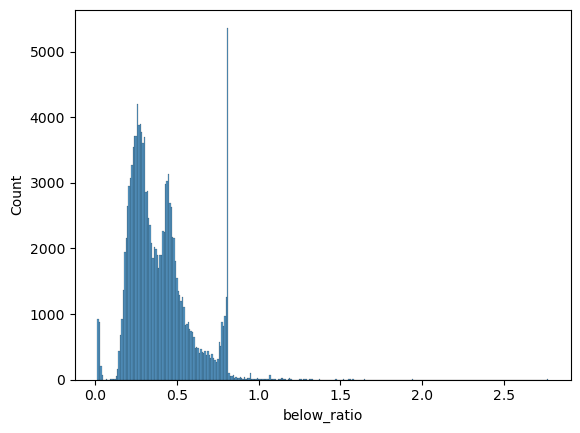

In [10]:
import seaborn as sns

sns.histplot(ifn,x='below_ratio')


In [22]:
import pandas as pd
df = pd.read_csv('../data/IFN_4_SP/tmp/Parcelas_exs_Asturias.csv')
df[['Provincia','VLE']]

,Provincia,VLE
0,33,0.286584
1,33,0.706907
2,33,0.221059
3,33,0.209640
4,33,1.869165
...,...,...
19026,33,1.286847
19027,33,3.424244
19028,33,0.751311
19029,33,0.433247
